<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and or big events on the weekly sales data; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic/external factors. 

## Learning Objectives

At the end of this session, you will know how to

1. Manipulate data of different types using `pandas`
1. Visualize data with `matplotlib` and `seaborn` to extract insights 
1. Perform feature engineering
1. Build a pipeline to preprocess data and fit a simple model using `sklearn`

*Note: if you see code that's unfamiliar to you, look up for the documentation, and try to understand what it does.*

## Data Overview

- Original sales data were collected from 45 stores across the United States; yet for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we ignore this mostly in this session and will discuss time series related techniques later in the cohort.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

In [129]:
# Helpers
clustmap = lambda x: sns.clustermap(x, annot=True)
corr_clustmap = lambda x: clustmap(x.corr())
densplot = lambda x: sns.kdeplot(x, shade=True)

## Task I: Load Data 

Built on top of `numpy`, `pandas` is one of the most widely used tools in machine learning. Its rich features are used for exploring, cleaning, visualizing, and transforming data.  We need to import the library to access all of its features. 

In [2]:
import pandas as pd

Use `pd.read_csv` to read `train_comb.csv` that contains weekly sales, metadata, and macroeconomic features from three stores into a `pd.DataFrame`.

In [3]:
filepath = '../dat/train_comb.csv'
data = pd.read_csv(filepath) 

Verify that the data is loaded correctly by running `data.sample(5)` to see the first few row ( AVOID printing out the entire DataFrame, i.e., `data` or `print(data)`; it might be trivial for small dataset but it can crash your kernel when the dataset is big and slow down the initial data exploration process ).

In [6]:
data.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
20343,4,98,2010-04-30,13049.48,False,53.04,2.787,NaN,NaN,NaN,NaN,NaN,126.380567,7.896,A,205863
5130,1,38,2010-04-30,127811.89,False,67.41,2.780,NaN,NaN,NaN,NaN,NaN,210.389546,7.808,A,151315
11200,4,7,2011-12-23,318422.01,False,35.92,3.103,2461.94,69.05,2938.24,52.0,4396.76,129.984548,5.143,A,205863
4563,1,34,2010-06-04,16317.32,False,80.69,2.705,NaN,NaN,NaN,NaN,NaN,211.176428,7.808,A,151315
22523,13,16,2010-03-12,11771.40,False,37.62,2.733,NaN,NaN,NaN,NaN,NaN,126.604286,8.316,A,219622


In [5]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,11062.000000,9260.000000,10779.000000,10990.000000,11062.000000,30990.000000,30990.000000,30990.000000
mean,6.050145,44.513746,26087.914360,61.278170,3.240187,9542.600315,4586.540622,2063.435241,4676.357248,6378.656460,157.540934,6.860820,192481.975605
std,5.113624,29.835120,32376.766734,17.113568,0.412234,8561.277370,12377.699214,12321.189247,7473.371273,4240.184513,41.179951,1.198274,29470.834745
min,1.000000,1.000000,-898.000000,16.940000,2.514000,410.310000,-10.500000,0.220000,8.000000,554.920000,126.064000,3.879000,151315.000000
25%,1.000000,20.000000,4539.080000,47.960000,2.837000,4539.940000,67.000000,9.800000,983.650000,3719.380000,127.859129,5.965000,151315.000000
50%,4.000000,38.000000,12941.920000,63.930000,3.294000,7146.900000,193.260000,50.600000,2421.080000,5563.920000,130.454621,7.193000,205863.000000
75%,13.000000,72.000000,35645.547500,76.800000,3.610000,11075.380000,3579.210000,157.620000,5005.960000,7740.270000,211.522460,7.808000,219622.000000
max,13.000000,99.000000,385051.040000,91.650000,3.907000,53423.290000,89121.940000,109030.750000,57817.560000,31844.200000,223.444251,8.623000,219622.000000


In [7]:
data.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       19928
MarkDown2       21730
MarkDown3       20211
MarkDown4       20000
MarkDown5       19928
CPI                 0
Unemployment        0
Type                0
Size                0
dtype: int64

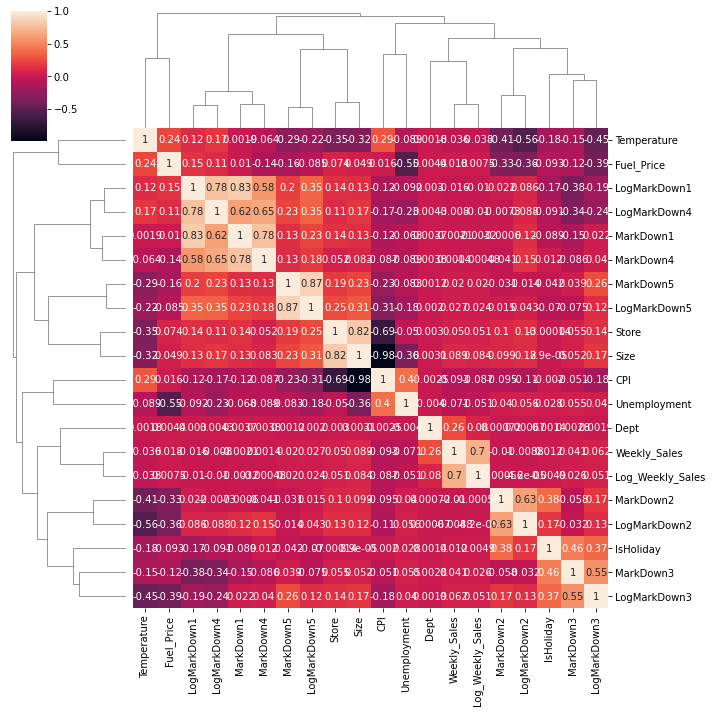

In [130]:
corr_clustmap(data)

❓ Question 1:

Some very highly correlated numbers. For instance, CPI and unemployment (which we'd expect). Also Weekly sales and dept. MarkDown1 and MarkDown4. Maybe these are enough to predict?

Looks like we have some continuous and categorical variables. I'll save them as lists below

In [9]:
categoricals = 'Store Dept IsHoliday Type'.split()
continuous   = 'Date Weekly_Sales Temperature Fuel_Price'.split() + ['MarkDown'+str(i) for i in range(1, 6)] + 'CPI Unemployment Size'.split()

<AxesSubplot:title={'center':'Store'}>

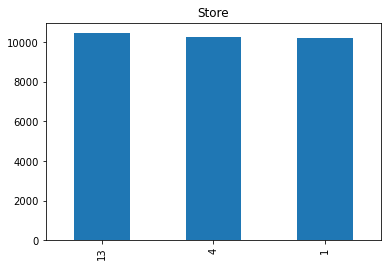

In [13]:
# Lets take a look at the distributions
data['Store'].value_counts().plot.bar(title='Store')

<AxesSubplot:title={'center':'Dept'}>

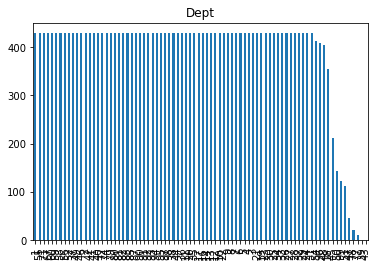

In [14]:
data['Dept'].value_counts().plot.bar(title='Dept')

<AxesSubplot:title={'center':'IsHoliday'}>

False    0.929364
True     0.070636
Name: IsHoliday, dtype: float64

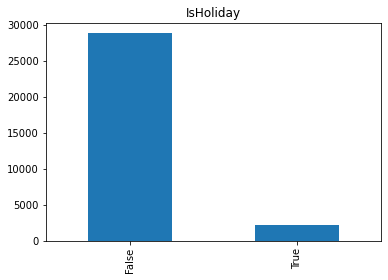

In [18]:
data['IsHoliday'].value_counts().plot.bar(title='IsHoliday')
data['IsHoliday'].value_counts() / len(data)  # Percent of rows

<AxesSubplot:title={'center':'Type'}>

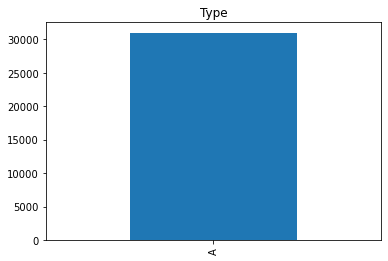

In [16]:
data['Type'].value_counts().plot.bar(title='Type')

Looks like an equal number of stores (only 3 of them too), and mostly equal departments (though a lot of them!).
Quite a few more holidays than I expected, looks like 7%. I'd expect 13 / (252+13) which is about 5%.
Type looks totally useless. We should drop it before it gets in the way.
We can also later add month and year from Date as a categorical, also maybe days to christmas.

Lets now look at the distribution of continuous variables.

In [34]:
# data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.dayofweek
# data['DayOfWeek']
pd.to_datetime(data['Date']).dt.month

0         2
1         2
2         2
3         2
4         3
         ..
30985     9
30986     9
30987     9
30988    10
30989    10
Name: Date, Length: 30990, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Density'>

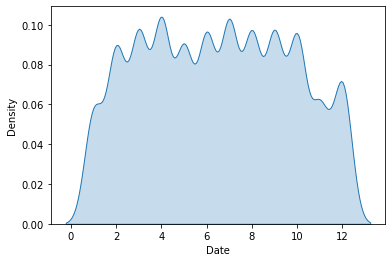

In [131]:
import seaborn as sns
import pandas as pd
densplot(pd.to_datetime(data['Date']).dt.month)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

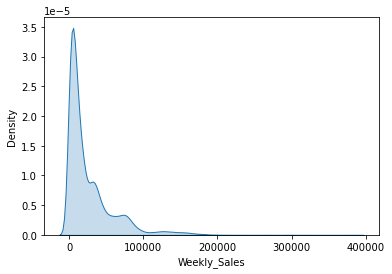

In [132]:
# This does not look normally distributed. Lets do the log trick
import numpy as np
densplot(data['Weekly_Sales'])

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

count    30956.000000
mean         9.259842
std          1.740970
min         -2.525729
25%          8.424167
50%          9.470988
75%         10.482524
max         12.861134
Name: Log_Weekly_Sales, dtype: float64

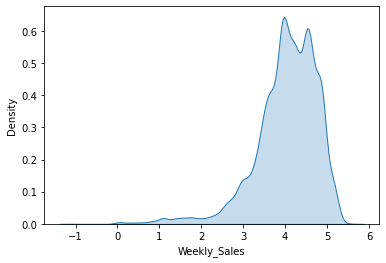

In [47]:
# Much better, lets save it
sns.kdeplot(np.log10(1+data['Weekly_Sales']), shade=True)
data['Log_Weekly_Sales'] = np.log(1 + data['Weekly_Sales'])
data['Log_Weekly_Sales'].describe()

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

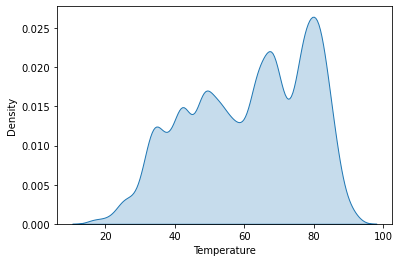

In [49]:
# This looks great, can maybe bucket it
sns.kdeplot(data['Temperature'], shade=True)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Density'>

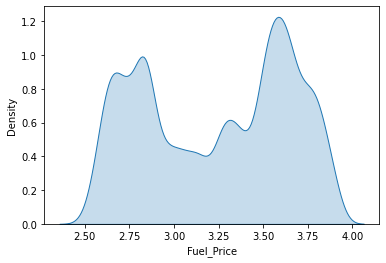

In [67]:
# Also looks good, seems like two large points
sns.kdeplot(data['Fuel_Price'], shade=True)

<AxesSubplot:xlabel='CPI', ylabel='Density'>

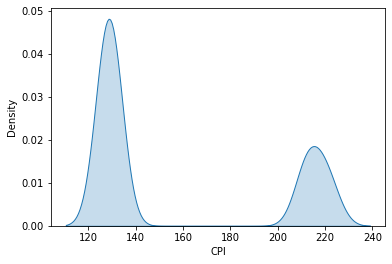

In [68]:
# Also looks good, also seems like two large points
sns.kdeplot(data['CPI'], shade=True)

<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

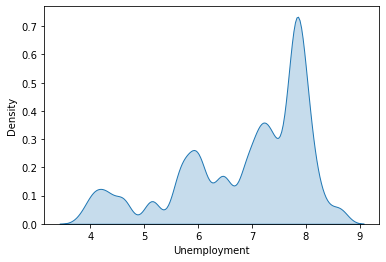

In [72]:
sns.kdeplot(data['Unemployment'], shade=True)

<AxesSubplot:xlabel='Size', ylabel='Density'>

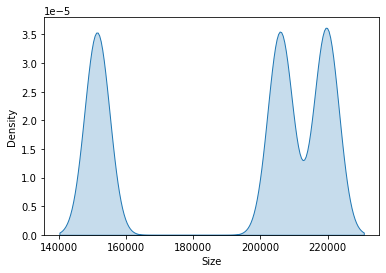

In [73]:
# Looks like 3 buckets, one for each store.
sns.kdeplot(data['Size'], shade=True)

<AxesSubplot:xlabel='MarkDown1', ylabel='Density'>

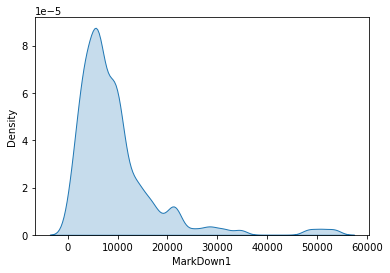

In [74]:
# mk1 looks like it could use a log
sns.kdeplot(data['MarkDown1'], shade=True)

<AxesSubplot:xlabel='LogMarkDown1', ylabel='Density'>

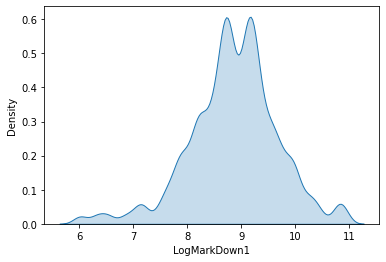

In [75]:
# Nice, i don't know what this column is, but this seems better.
data['LogMarkDown1'] = np.log(1+data['MarkDown1'])
sns.kdeplot(data['LogMarkDown1'], shade=True)

<AxesSubplot:xlabel='MarkDown2', ylabel='Density'>

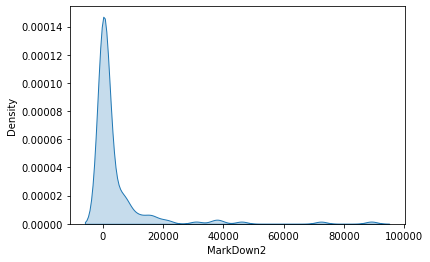

In [77]:
# Also needs log
sns.kdeplot(data['MarkDown2'], shade=True)

<AxesSubplot:xlabel='LogMarkDown2', ylabel='Density'>

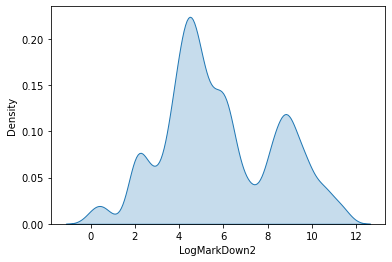

In [78]:
# Nice, i also don't know what this column is, but this seems better.
data['LogMarkDown2'] = np.log(1+data['MarkDown2'])
sns.kdeplot(data['LogMarkDown2'], shade=True)

<AxesSubplot:xlabel='MarkDown3', ylabel='Density'>

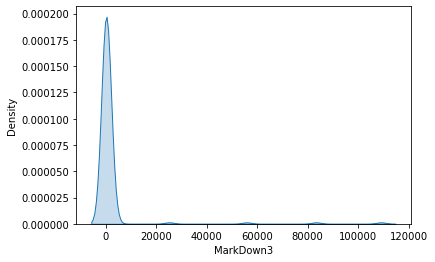

In [81]:
# Also needs log
sns.kdeplot(data['MarkDown3'], shade=True)

<AxesSubplot:xlabel='LogMarkDown3', ylabel='Density'>

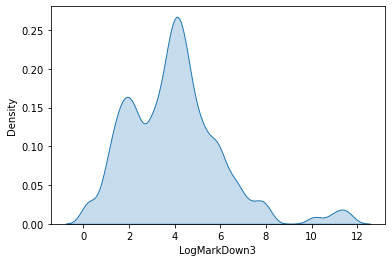

In [82]:
# Nice, i still don't know what this column is, but this seems better.
data['LogMarkDown3'] = np.log(1+data['MarkDown3'])
sns.kdeplot(data['LogMarkDown3'], shade=True)

<AxesSubplot:xlabel='MarkDown4', ylabel='Density'>

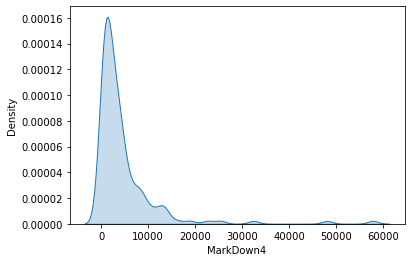

In [83]:
# All markdowns need log?
sns.kdeplot(data['MarkDown4'], shade=True)

<AxesSubplot:xlabel='LogMarkDown4', ylabel='Density'>

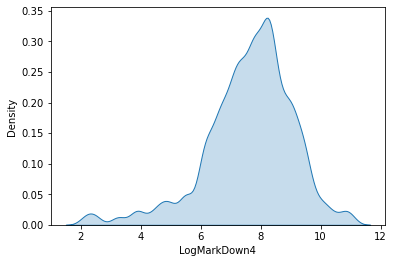

In [84]:
# What the heck are these???
data['LogMarkDown4'] = np.log(1+data['MarkDown4'])
sns.kdeplot(data['LogMarkDown4'], shade=True)

<AxesSubplot:xlabel='MarkDown5', ylabel='Density'>

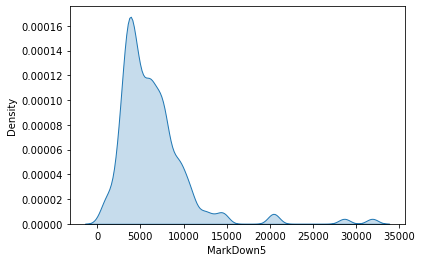

In [85]:
# Sigh.....
sns.kdeplot(data['MarkDown5'], shade=True)

<AxesSubplot:xlabel='LogMarkDown5', ylabel='Density'>

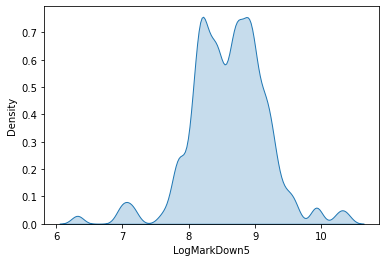

In [86]:
# last one right?
data['LogMarkDown5'] = np.log(1+data['MarkDown5'])
sns.kdeplot(data['LogMarkDown5'], shade=True)

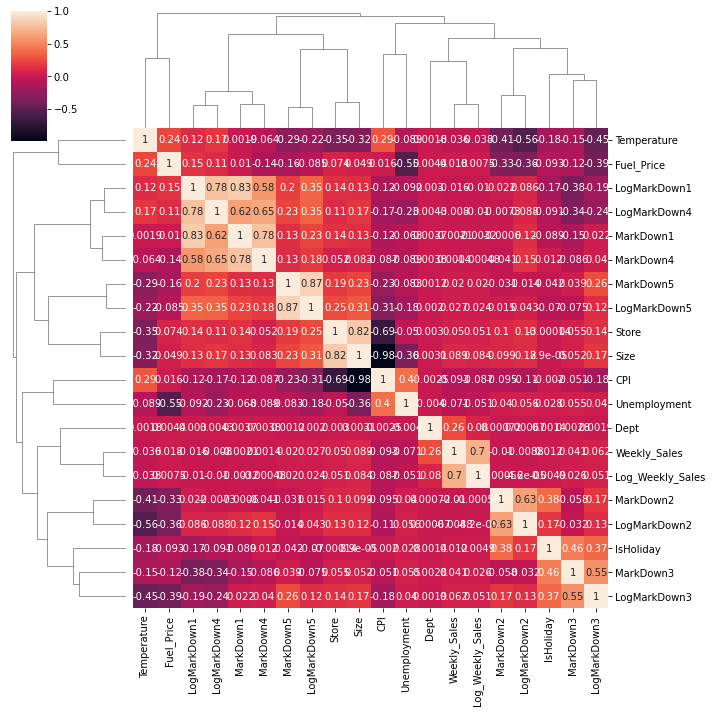

In [91]:
# Lets recalc our corr now that we have new cols
sns.clustermap(data.corr(), annot=True)

Use `.shape` to inspect the size of the data: sample size and number of features.

In [93]:
data.shape

(30990, 22)

<details>
<summary>Expected Output</summary>
(30990, 16)
</details>

For the following task, we focus on Store `1` only, 

In [98]:
data_store1 = data[data['Store'] == 1].drop(columns=['Store', 'Size'])  # Dropping these cols as they are always the same for 1 store
data_store1.describe()

,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Log_Weekly_Sales,LogMarkDown1,LogMarkDown2,LogMarkDown3,LogMarkDown4,LogMarkDown5
count,10244.000000,10244.000000,10244.000000,10244.000000,3657.000000,3015.000000,3588.000000,3657.000000,3657.000000,10244.000000,10244.000000,10229.000000,3657.000000,3015.000000,3588.000000,3657.000000,3657.000000
mean,44.391742,21710.543621,68.224463,3.218811,8086.730317,2967.164896,1245.403495,3755.210418,5027.746924,215.995525,7.610918,9.042176,8.710852,5.410128,3.499839,7.248807,8.344703
std,29.867247,27748.945511,14.203190,0.425663,6542.418999,7911.846775,7867.455965,5950.682305,3267.918094,4.335980,0.382613,1.738958,0.806187,2.452928,1.956574,1.686034,0.620913
min,1.000000,-863.000000,35.400000,2.514000,410.310000,0.500000,0.250000,8.000000,554.920000,210.337426,6.573000,0.000000,6.019347,0.405465,0.223144,2.197225,6.320624
25%,20.000000,3465.622500,57.790000,2.759000,4039.390000,40.480000,6.000000,577.140000,3127.880000,211.531248,7.348000,8.158800,8.304097,3.725211,1.945910,6.359816,8.048430
50%,38.000000,10289.375000,69.640000,3.290000,6154.140000,137.860000,30.230000,1822.550000,4325.190000,215.459905,7.787000,9.241461,8.725043,4.933466,3.441379,7.508540,8.372443
75%,72.000000,31452.957500,80.480000,3.594000,10121.970000,1569.000000,101.640000,3750.590000,6222.250000,220.636902,7.838000,10.359136,9.222562,7.358831,4.631228,8.229935,8.736048
max,99.000000,203670.470000,91.650000,3.907000,34577.060000,46011.380000,55805.510000,32403.870000,20475.320000,223.444251,8.106000,12.224264,10.450975,10.736666,10.929646,10.386064,9.927024


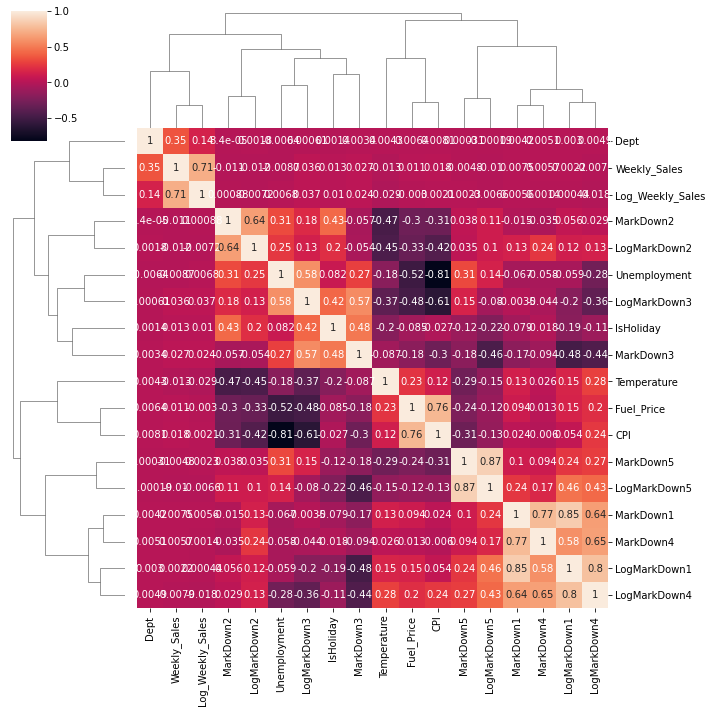

In [99]:
sns.clustermap(data_store1.corr(), annot=True)

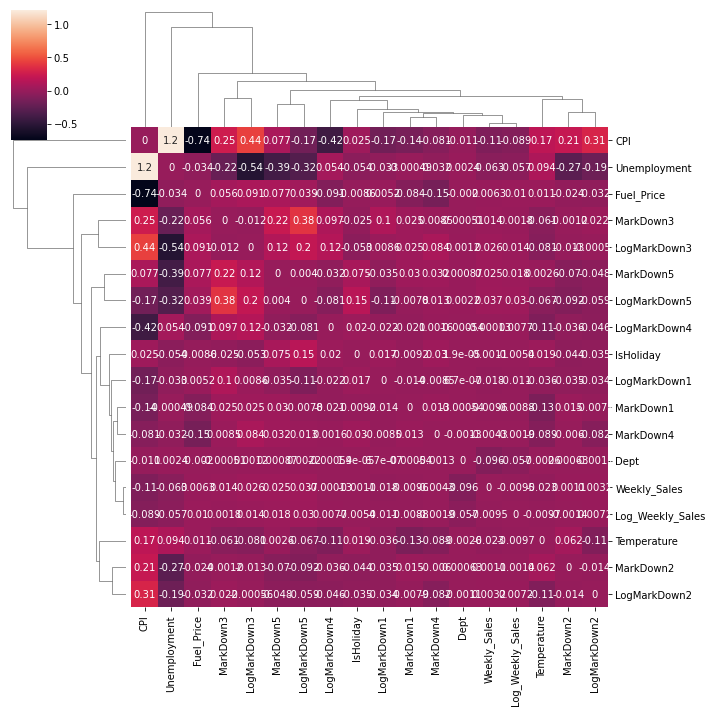

In [100]:
# And how different is it from normal?
sns.clustermap(data.drop(columns=['Store', 'Size']).corr() - data_store1.corr(), annot=True)

Retrieve the data from department 9 ( a random choice ) at store 1:

In [105]:
data_store1_dept9 = data_store1[data_store1.Dept == 9].drop(columns=['Dept'])

Verify the result using `.head()`, `.shape`.

In [102]:
data_store1_dept9.head()
data_store1_dept9.shape

,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Log_Weekly_Sales,LogMarkDown1,LogMarkDown2,LogMarkDown3,LogMarkDown4,LogMarkDown5
1144,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,9.736960,NaN,NaN,NaN,NaN,NaN
1145,9,2010-02-12,16562.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,9.714956,NaN,NaN,NaN,NaN,NaN
1146,9,2010-02-19,15880.85,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,9.672932,NaN,NaN,NaN,NaN,NaN
1147,9,2010-02-26,15175.52,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,9.627505,NaN,NaN,NaN,NaN,NaN
1148,9,2010-03-05,24064.70,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,10.088543,NaN,NaN,NaN,NaN,NaN


(143, 20)

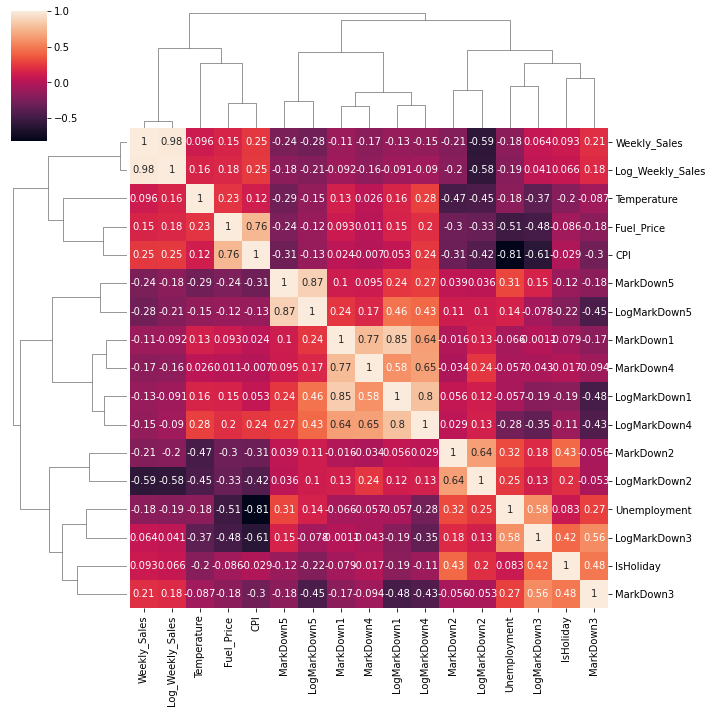

In [106]:
sns.clustermap(data_store1_dept9.corr(), annot=True)

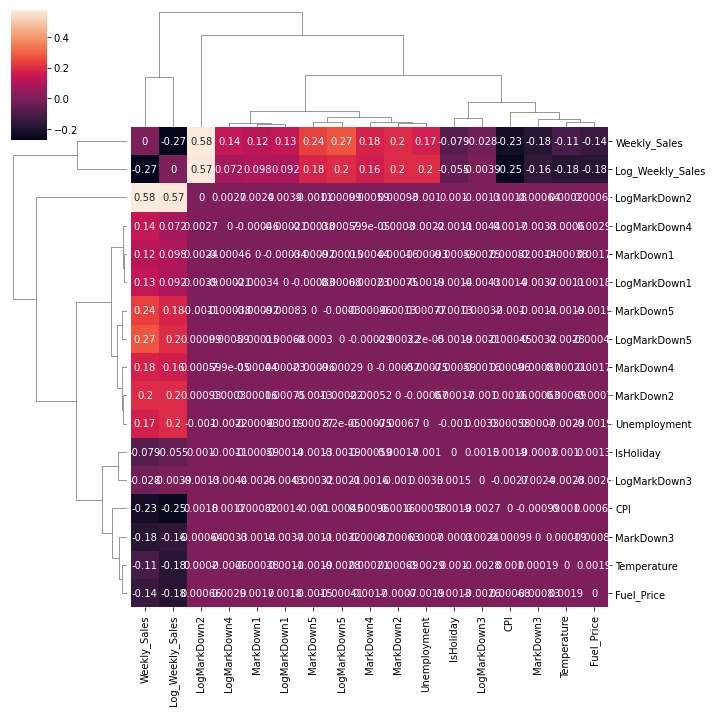

In [107]:
# Again, whats the change in corr?
sns.clustermap(data_store1.drop(columns=['Dept']).corr() - data_store1_dept9.corr(), annot=True)

<details>
<summary>Expected Output</summary>
(143, 16)
</details>


Visualize one full year of sales. The data came with dates sorted, but we can make sure of it and then visualize the first 52 data  points.

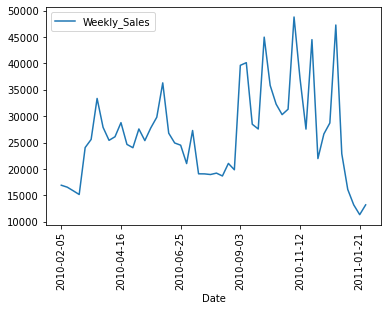

In [108]:
data_store1_dept9 = data_store1_dept9.sort_values('Date')
data_store1_dept9[['Date', 'Weekly_Sales']].iloc[:52]\
    .set_index('Date').plot(rot=90);

❓ Question 2:

Do you have any hypotheses about the holidays' impact on the sales?

In theory it should have a large impact, because christmas and black friday. But it does not look highly correlated at all.

**For the purpose of this notebook, we focus on the sales data from Store 1** in DataFrame `df` and is saved in `train_store1.csv`. Let's read in the data.

In [149]:
df = pd.read_csv("../dat/train-store1.csv").drop(columns=['Store', 'Size'])
df

,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type
0,1,2010-02-05,"24,924.50",False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,A
1,1,2010-02-12,"46,039.49",True,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,A
2,1,2010-02-19,"41,595.55",False,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,A
3,1,2010-02-26,"19,403.54",False,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,A
4,1,2010-03-05,"21,827.90",False,46.50,2.62,NaN,NaN,NaN,NaN,NaN,211.35,8.11,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,99,2012-08-31,20.06,False,80.49,3.64,"21,442.73",102.32,21.70,"13,209.64","3,032.96",222.31,6.91,A
10240,99,2012-09-07,0.05,True,83.96,3.73,"5,204.68",35.74,50.94,"4,120.32","2,737.17",222.44,6.91,A
10241,99,2012-09-14,0.03,False,74.97,3.72,"17,212.52",7.00,18.79,"1,523.11","7,992.72",222.58,6.91,A
10242,99,2012-10-05,635.00,False,68.55,3.62,"8,077.89",NaN,18.22,"3,617.43","3,626.14",223.18,6.57,A


Extract week, month, and year information from the raw `Date` column to better manipulate the weekly data later. Pandas comes with powerful features to make this step easy. Reference: [tutorial
](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html). 

First, use `.dtypes` to check the datatype of the `Date` column. What's the difference between `df[['Date']]` and `df['Date']`?.

In [112]:
df['Datetime'] = pd.to_datetime(df['Date'])
df['Week'] = df['Datetime'].dt.week
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year
df[['Week', 'Month', 'Year']]

,Week,Month,Year
0,5,2,2010
1,6,2,2010
2,7,2,2010
3,8,2,2010
4,9,3,2010
...,...,...,...
10239,35,8,2012
10240,36,9,2012
10241,37,9,2012
10242,40,10,2012


<details>
<summary>Expected Output</summary>
Date    object
dtype: object
</details>

In [274]:
# I did my code above before i saw this
# Lets do all the normalizations I did before but on this df
def add_features(df):
    df['Datetime'] = pd.to_datetime(df['Date'])
    df['Week'] = df['Datetime'].dt.week
    df['Month'] = df['Datetime'].dt.month
    df['Year'] = df['Datetime'].dt.year
    df[['Week', 'Month', 'Year']]
    for mkdwn in range(1, 6):
        df[f'LogMarkDown{mkdwn}'] = np.log(1 + df[f'MarkDown{mkdwn}'])
        df[f'MarkDown{mkdwn}_na'] = df[f'MarkDown{mkdwn}'].isna().astype(int)
        df[f'MarkDown{mkdwn}'] = df[f'MarkDown{mkdwn}'].fillna(df[f'MarkDown{mkdwn}'].mean())
        df[f'LogMarkDown{mkdwn}'] = df[f'LogMarkDown{mkdwn}'].fillna(df[f'LogMarkDown{mkdwn}'].mean())
    df['Log_Weekly_Sales'] = np.log(1 + df['Weekly_Sales'])
    for cat_col in 'Dept IsHoliday Type Week Month Year'.split():
        df[cat_col] = df[cat_col].astype('category')
    return df
df = add_features(df)

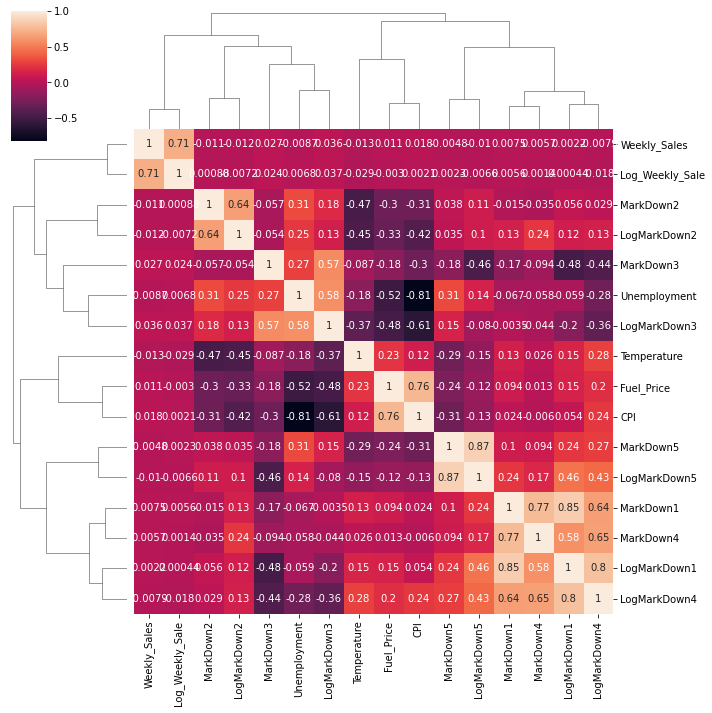

In [141]:
sns.clustermap(df.corr(), annot=True)

❓ Question 3:

Last step before we look deeper into the features is to split the data set into training and testing datasets. Discuss: why do we want to perform EDA only on the training data, not the entire dataset? Shouldn't it be the more the better?

To avoid data leakage, so that the model will definitely work. Looking at test data answers is like cheating, and you will overfit rather than having a nice model that works for real data.

Its recommended to never look at test data until the model is done

*The answer should mention data leakage, and / or overfitting*

Split the data into training (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now ).

In [142]:
from sklearn.model_selection import train_test_split

In [159]:
df_train, df_test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=42)

In [144]:
print('Original set  ---> ',df.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)

Original set  --->  (10244, 24) 
Training set  --->  (8195, 24) 
Testing set   --->  (2049, 24)


<details>
<summary>Expected Output</summary>

    ```
    Original set  --->  (10244, 19) 
    Training set  --->  (8195, 19) 
    Testing set   --->  (2049, 19)
    ```
</details>

## Task II: Target, Features, and Distributions

We inspect the datatype of column `Date`; now find datatypes for all columns in `df_train` using `.dtypes`:

In [160]:
df_train.dtypes

Dept                      category
Date                        object
Weekly_Sales               float64
IsHoliday                 category
Temperature                float64
Fuel_Price                 float64
MarkDown1                  float64
MarkDown2                  float64
MarkDown3                  float64
MarkDown4                  float64
MarkDown5                  float64
CPI                        float64
Unemployment               float64
Type                      category
Datetime            datetime64[ns]
Week                      category
Month                     category
Year                      category
LogMarkDown1               float64
LogMarkDown2               float64
LogMarkDown3               float64
LogMarkDown4               float64
LogMarkDown5               float64
Log_Weekly_Sales           float64
dtype: object

<details>
<summary>Expected Output</summary>

```
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object
```
</details>

Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [161]:
pd.options.display.float_format = "{:,.2f}".format
df_train.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,LogMarkDown1,LogMarkDown2,LogMarkDown3,LogMarkDown4,LogMarkDown5,Log_Weekly_Sales
count,"8,195.00","8,195.00","8,195.00","2,931.00","2,424.00","2,878.00","2,931.00","2,931.00","8,195.00","8,195.00","2,931.00","2,424.00","2,878.00","2,931.00","2,931.00","8,184.00"
mean,"21,865.28",68.19,3.22,"8,045.43","2,961.55","1,236.83","3,683.59","5,023.69",216.00,7.61,8.71,5.38,3.51,7.24,8.34,9.05
std,"27,970.00",14.16,0.43,"6,484.49","8,032.30","7,830.99","5,849.69","3,303.07",4.33,0.38,0.80,2.46,1.96,1.68,0.62,1.74
min,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,6.02,0.41,0.22,2.20,6.32,0.00
25%,"3,502.09",57.79,2.76,"4,039.39",40.48,6.00,577.14,"3,127.88",211.57,7.35,8.30,3.73,1.95,6.36,8.05,8.17
50%,"10,357.32",69.64,3.29,"6,154.14",137.86,30.23,"1,822.55","4,325.19",215.46,7.79,8.73,4.93,3.44,7.51,8.37,9.25
75%,"31,647.36",80.48,3.59,"10,121.97","1,569.00",101.64,"3,639.42","6,222.25",220.64,7.84,9.22,7.36,4.63,8.20,8.74,10.36
max,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,10.45,10.74,10.93,10.39,9.93,12.22


In [162]:
# At this point i made my category columns categoricals
df_train.describe(include='category')

,Dept,IsHoliday,Type,Week,Month,Year
count,8195,8195,8195,8195,8195,8195
unique,77,2,1,52,12,3
top,20,False,A,39,4,2011
freq,127,7599,8195,190,808,3000


In [163]:
df_train.isna().sum()

Dept                   0
Date                   0
Weekly_Sales           0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1           5264
MarkDown2           5771
MarkDown3           5317
MarkDown4           5264
MarkDown5           5264
CPI                    0
Unemployment           0
Type                   0
Datetime               0
Week                   0
Month                  0
Year                   0
LogMarkDown1        5264
LogMarkDown2        5771
LogMarkDown3        5317
LogMarkDown4        5264
LogMarkDown5        5264
Log_Weekly_Sales      11
dtype: int64

<details>
<summary>Expected Output</summary>

```
	Store	Dept	Weekly_Sales	Temperature	Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment	Size	week	month	year
count	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	2,931.00	2,424.00	2,878.00	2,931.00	2,931.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00
mean	1.00	44.65	21,865.28	68.19	3.22	8,045.43	2,961.55	1,236.83	3,683.59	5,023.69	216.00	7.61	151,315.00	25.89	6.47	2,010.96
std	0.00	29.95	27,970.00	14.16	0.43	6,484.49	8,032.30	7,830.99	5,849.69	3,303.07	4.33	0.38	0.00	14.19	3.25	0.80
min	1.00	1.00	-863.00	35.40	2.51	410.31	0.50	0.25	8.00	554.92	210.34	6.57	151,315.00	1.00	1.00	2,010.00
25%	1.00	20.00	3,502.09	57.79	2.76	4,039.39	40.48	6.00	577.14	3,127.88	211.57	7.35	151,315.00	14.00	4.00	2,010.00
50%	1.00	38.00	10,357.32	69.64	3.29	6,154.14	137.86	30.23	1,822.55	4,325.19	215.46	7.79	151,315.00	26.00	6.00	2,011.00
75%	1.00	72.00	31,647.36	80.48	3.59	10,121.97	1,569.00	101.64	3,639.42	6,222.25	220.64	7.84	151,315.00	38.00	9.00	2,012.00
max	1.00	99.00	203,670.47	91.65	3.91	34,577.06	46,011.38	55,805.51	32,403.87	20,475.32	223.44	8.11	151,315.00	52.00	12.00	2,012.0
```
</details>

❓ Question 4:

Inspect the output, what are some of your observations?

As I drew above, we have many distributions that look like buckets

Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [164]:
#Why is Log_weekly_sales na? Also many markdowns are na, we can probably give them median or mode and then add a feature column saying it was nan

In [172]:
for i in range(1, 6):
    display(df_train[f'MarkDown{i}'].isna().value_counts())

True     5264
False    2931
Name: MarkDown1, dtype: int64

True     5771
False    2424
Name: MarkDown2, dtype: int64

True     5317
False    2878
Name: MarkDown3, dtype: int64

True     5264
False    2931
Name: MarkDown4, dtype: int64

True     5264
False    2931
Name: MarkDown5, dtype: int64

<AxesSubplot:>

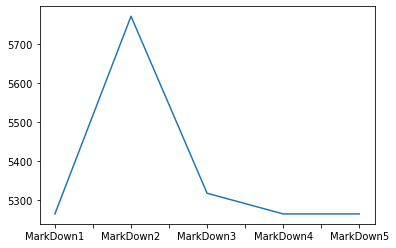

In [177]:
# Most of these markdown nans are similar distributions. Lets look over time
cols = [f'MarkDown{i}' for i in range(1, 6)]
df_train[cols].isna().sum().plot()

<details>
<summary>Expected Output</summary>

```
Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64
```
</details>

What do you think the target variable is in this problem? Assign the column name to `target` for later use.

In [178]:
target = "Log_Weekly_Sales"  # Easier to predict this than Weekly_Sales? Is it still useful?

Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). Anything here you observe but the output from `.describe` does not make obvious? Does it follow a normal distribution?

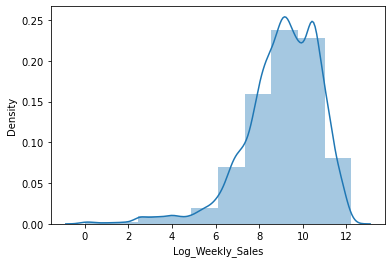

In [179]:
import seaborn as sns
sns.distplot(df_train[target],bins=10);

<AxesSubplot:xlabel='Log_Weekly_Sales', ylabel='Density'>

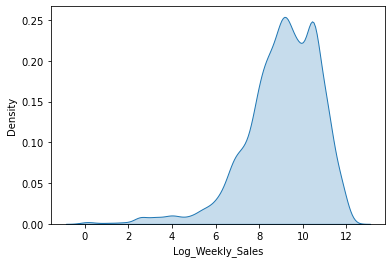

In [180]:
densplot(df_train[target])

Notice that there exists nonpositive weekly sales. How many of rows are there that the weekly sales are negative or 0?

In [182]:
(df_train[target].fillna(0) <= 0).sum() # Expected Output: 13

13

What percentage is the negative and zero sales?

In [183]:
13 / len(df_train)  # 0.16%

0.0015863331299572911

<details>
<summary>Expected Output</summary>

`0.0015863331299572911` or `0.16%`
</details>

After communicating your findings, the stakeholders confirm that you can remove these data entries for now and they are launching an investigation by analysts and data engineers. 

Now remove them from the training dataset.

<AxesSubplot:xlabel='Log_Weekly_Sales', ylabel='Density'>

(8182, 24)

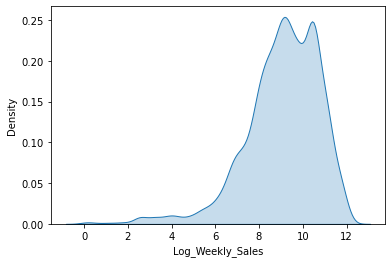

In [185]:
mask = df_train[target].fillna(0) > 0
df_train = df_train[mask]
densplot(df_train[target])
df_train.shape # Expected Output: (8182, 19)

Let's move on to features. 

Though almost all the come through as numerical, should they all be treated as numerical features? Let's inspect the number of unique values: 

In [186]:
[(col, df[col].nunique())for col in df_train.columns]

[('Dept', 77),
 ('Date', 143),
 ('Weekly_Sales', 10042),
 ('IsHoliday', 2),
 ('Temperature', 143),
 ('Fuel_Price', 137),
 ('MarkDown1', 51),
 ('MarkDown2', 41),
 ('MarkDown3', 49),
 ('MarkDown4', 51),
 ('MarkDown5', 51),
 ('CPI', 143),
 ('Unemployment', 12),
 ('Type', 1),
 ('Datetime', 143),
 ('Week', 52),
 ('Month', 12),
 ('Year', 3),
 ('LogMarkDown1', 51),
 ('LogMarkDown2', 41),
 ('LogMarkDown3', 49),
 ('LogMarkDown4', 51),
 ('LogMarkDown5', 51),
 ('Log_Weekly_Sales', 10029)]

`Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous. Those tie to the second business objective. Let us put these four into a list and store it in `external_factors`. From earlier, we noticed that `MarkDownx` columns contain some missing values, we will treat them in a later task. 

In [187]:
external_factors = ['Temperature','CPI','Unemployment', 'Fuel_Price']

Visualize Temperature in a box plot, what do you think is the advantage of a box plot over a histogram? You can use `pd.DataFrame.boxplot()`, set the figure size as (6, 4), and turn off the grid.

<AxesSubplot:>

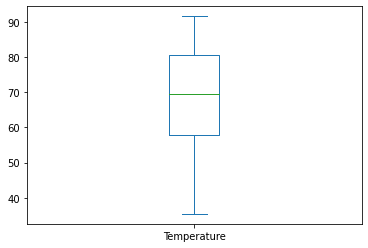

In [192]:
df_train['Temperature'].plot.box(grid=False)

<AxesSubplot:ylabel='Frequency'>

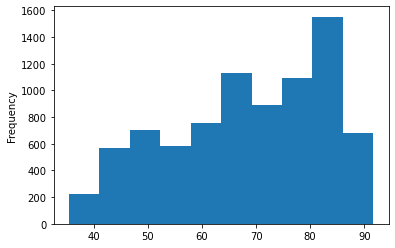

In [194]:
df_train['Temperature'].plot.hist()

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

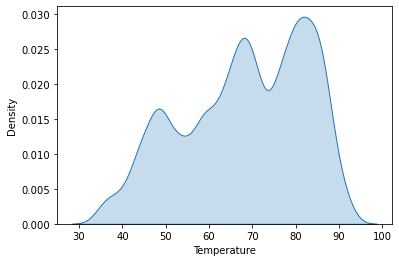

In [193]:
densplot(df_train['Temperature'])

❓ Question 5:

Visualize Temperature in a box plot, what do you think the advantage of a box plot over histogram? 

HINT: You can use `pd.DataFrame.boxplot()`, set the figure size as (6, 4), and turn off the grid.

I don't know, I much prefer the densplot, which seems better imo

In [ ]:
# YOUR CODE HERE

Let's visualize all four numerical features in both density plot and box plot. Note any observations.

                                 Numeric Features Distribution                                  


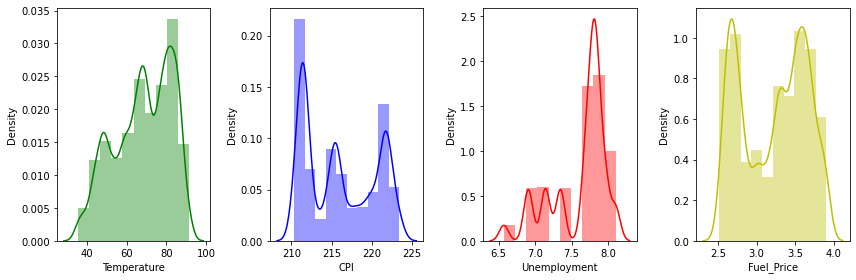

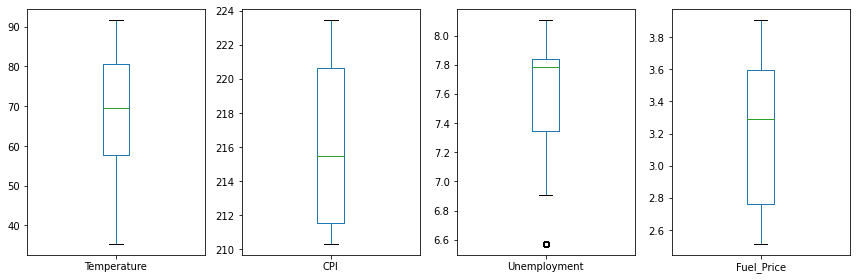

In [197]:
import matplotlib.pyplot as plt
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df_train[external_factors[i]],
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

# boxplot
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    df_train.boxplot(external_factors[i], grid=False)
plt.tight_layout();

We will investigate the impacts of the external factors later. Now let's scan through the other features.

`Store`, `Type`, and `Size` each has only one unique value, offering no information, we can safely ignore them. 

We extracted `year`, `month`, and `week` from  `Date`, thus `Date` is redundant; but it is easy to find the date range in the training dataset using `Date`:

In [198]:
df_train['Datetime'].min(), df_train['Datetime'].max() # Expected Output: (Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Our training data ranges from 5th of February 2010 to 26th of October 2012.

It makes more sense to treat `year`, `month`, `week` as categorical, more accurately ordinal; and the boolean feature `IsHoliday` can be considered as categorical, so can `Dept`. Let's put these column names into a list `categoricalFeatures`.

In [203]:
categoricalFeatures = ['Year','Month','Week','IsHoliday', 'Dept']

For the categorical features, we are more interested in the frequency of each value, use `pd.Series.value_counts` to see how many rows where `IsHoliday` is true and false respectively ( Data imbalance is the norm ).

In [204]:
for col in categoricalFeatures:
    display(df_train[col].value_counts())

2011    2994
2010    2743
2012    2445
Name: Year, dtype: int64

4     807
7     758
9     757
3     753
6     748
10    740
8     737
5     687
2     686
12    590
11    473
1     446
Name: Month, dtype: int64

39    190
13    183
14    181
6     181
19    180
12    180
24    180
36    175
18    175
11    174
40    174
5     174
43    174
35    173
15    173
22    173
25    173
31    172
38    172
41    171
32    170
33    170
23    169
10    169
28    169
17    168
9     168
7     168
34    168
37    168
20    167
21    165
16    164
8     163
29    162
30    161
27    161
26    158
42    157
46    125
52    125
45    122
48    120
3     119
50    117
51    116
47    115
4     113
49    112
44    111
1     109
2     105
Name: Week, dtype: int64

False    7586
True      596
Name: IsHoliday, dtype: int64

20    127
95    122
55    122
24    121
2     121
     ... 
99     30
51     28
47      6
78      3
77      2
Name: Dept, Length: 77, dtype: int64

<details>
<summary>Expected Output</summary>

```
False    7586
True      596
Name: IsHoliday, dtype: int64
```
</details>

Visualize the distribution of `month`; use `sns.countplot()`.

<AxesSubplot:xlabel='Month', ylabel='count'>

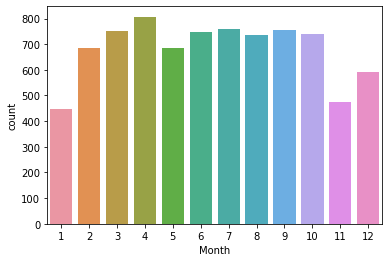

In [205]:
sns.countplot(df_train['Month'])

                               Visualising Categorical Features:                                


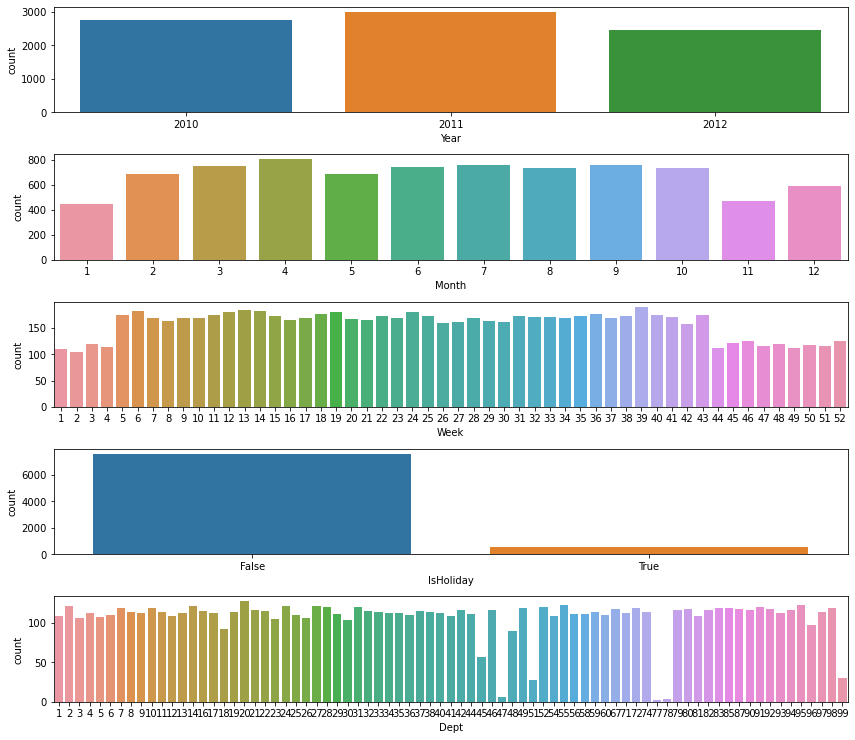

In [214]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))

for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot(df_train[categoricalFeatures[i]])
    # densplot(df_train[categoricalFeatures[i]].value_counts())
plt.tight_layout();

❓ Question 6: 

Discuss with your pair programming partner: There is less data in 2012 than the previous two years, did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?


The data just ends in 2012, about 3/4 into the year. Its not that there's less sales, there is less data

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

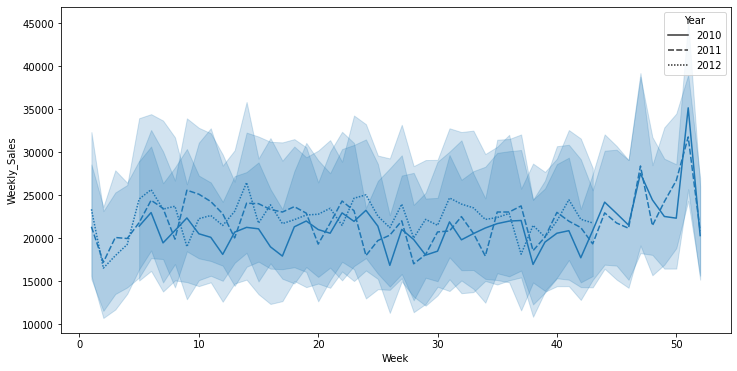

In [219]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x="Week", y="Weekly_Sales",  style='Year')

<AxesSubplot:xlabel='Week', ylabel='Log_Weekly_Sales'>

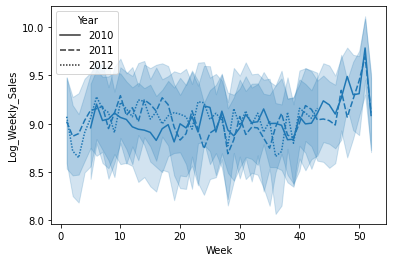

In [220]:
sns.lineplot(data=df_train, x="Week", y="Log_Weekly_Sales",  style='Year')

<AxesSubplot:xlabel='Week', ylabel='Temperature'>

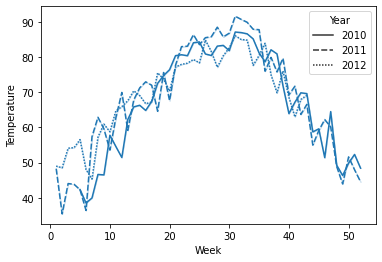

In [225]:
sns.lineplot(data=df_train, x="Week", y="Temperature",  style='Year')

## Task III: Impact from Holidays

The first business objective is to understand the impact of holidays on weekly sales. 

There is a flag provided for us: `IsHoliday`, let's calculate the average weekly sales for holiday weeks and non-holiday weeks, respectively. For this, we will use `.groupBy` and `.mean()`. Are holiday sales higher?

In [226]:
df_train.groupby('IsHoliday')[['Weekly_Sales', 'Log_Weekly_Sales']].mean()  # Holiday sales are a little higher on average

,Weekly_Sales,Log_Weekly_Sales
IsHoliday,,
False,"21,756.05",9.05
True,"23,737.05",9.11


<details>
<summary>Expected Output</summary>

```
IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64
```
</details>


But we would like to understand it at more granular level, remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

We create a flag for each holiday to help you analyze weekly sale by each holiday type

In [227]:
superbowl_mask = df_train['Datetime'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df_train['Datetime'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df_train['Datetime'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df_train['Datetime'].isin(['2010-12-31', '2011-12-30'])

In [228]:
df_train['superbowl'] = superbowl_mask
df_train['laborday'] = laborday_mask
df_train['thanksgiving'] =thanksgiving_mask
df_train['christmas'] = christmas_mask

Run the next cell to see 1) how many weekly sales fell on Christmas (does it make sense? what did we not account for?) 2) what is the average weekly sales stratified by whether it is Christmas week or not?

In [230]:
df_train.groupby(['christmas'])\
        .agg(count = ('christmas', 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))

# This cannot make sense, there are so many non-christmas weeks. Its better compare directly against the weeks before and after xmas

,count,avg_weekly_sales
christmas,,
False,8057,"21,921.06"
True,125,"20,565.56"


Perform the same for the other three holidays:

In [231]:
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
    summary_stats = df_train.groupby([holiday]).agg(count=(holiday, 'size'), avg_weekly_sales=('Weekly_Sales', 'mean'))
        # YOUR CODE HERE
        # YOUR CODE HERE
    print(summary_stats)
    print()

           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56



<details>
<summary>Expected Output</summary>

```
           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56
```
</details>


Without hypothesis testing and by only eyeballing, it seems like Super Bowl and Thanksgiving has a positive impact on the weekly sales for Store 1 in this training dataset. 
Discuss with your teammate, are you surprised that during Christmas, sales at Walmart do not go up? Holiday effect, if causal, happened most during Thanksgiving weeks, is this something you expected?


Yes most people buy presents before christmas. During christmas week they are at home usually.

We have been ignoring `Dept`, let's take a look at the plot below showing the weekly sales by department in 2011. 

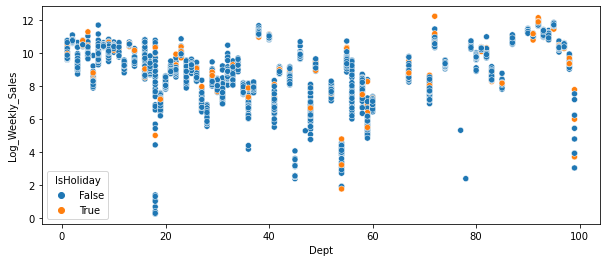

In [233]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_train[df_train.Year==2011], x = 'Dept', y= target, hue='IsHoliday');

Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

## Task IV: Visualize Relationship between Macroeconomic & External Factors and Sales

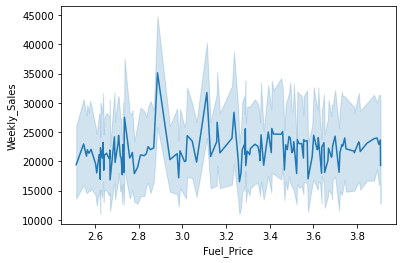

In [234]:
sns.lineplot(data=df_train, x="Fuel_Price", y="Weekly_Sales");

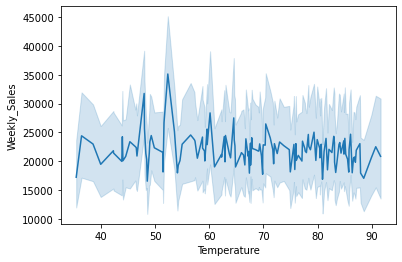

In [235]:
sns.lineplot(data=df_train, x="Temperature", y="Weekly_Sales");

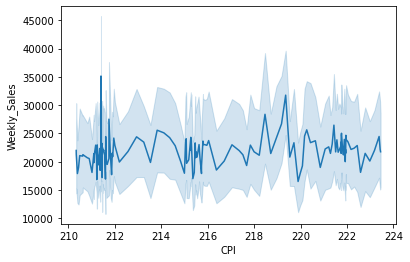

In [236]:
sns.lineplot(data=df_train, x="CPI", y="Weekly_Sales");

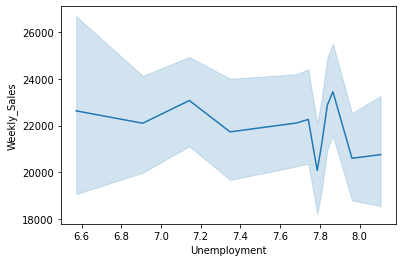

In [237]:
sns.lineplot(data=df_train, x="Unemployment", y="Weekly_Sales");

By eyeballing, do you find strong evidence that those are correlated with Walmart's weekly sales? Do you think `lineplot` is an appropriate plot for this?

No, correlation plots like heatmap or clustermap are better. As we see below, they are not correlated :D but they are correlated to each other

Lastly, we calculate the spearman correlations among target and external factors and verify that there is no strong linear correlation between the target variable and these features.

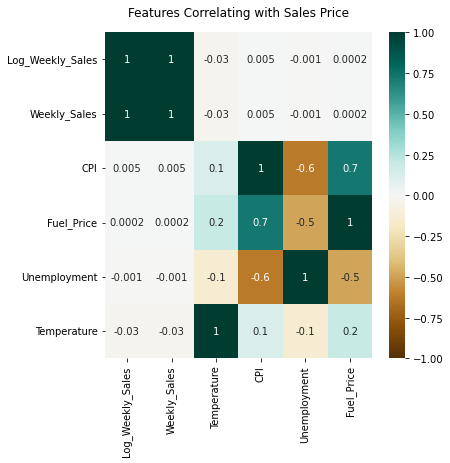

In [295]:
plt.figure(figsize=(6, 6))
df_train_reduced = df_train[[target, 'Weekly_Sales'] + external_factors]
corr = df_train_reduced.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by=target, ascending=False),
                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

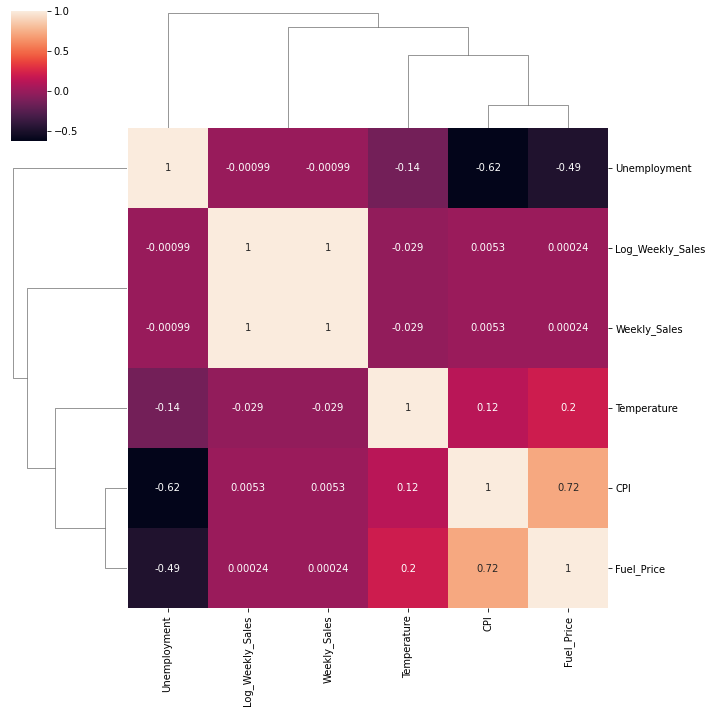

In [296]:
clustmap(corr)

In [248]:
df_train['Weekly_Sales'].autocorr(), df_train['Log_Weekly_Sales'].autocorr()

(-0.01229297899593892, 0.007319107215934451)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

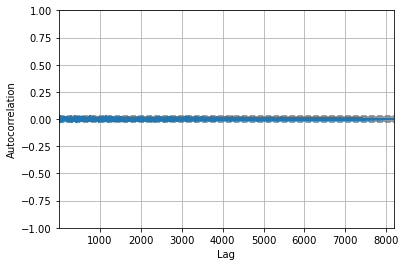

In [257]:
pd.plotting.autocorrelation_plot(df_train.set_index('Datetime').sort_index()['Log_Weekly_Sales'])

In [ ]:
# Pretty much no autocorr, lets try others for fun

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

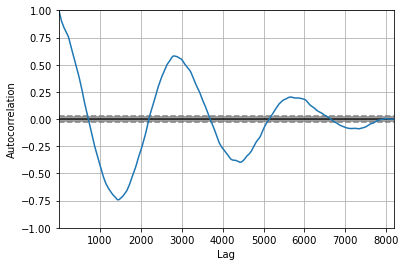

In [258]:
pd.plotting.autocorrelation_plot(df_train.set_index('Datetime').sort_index()['Temperature'])  # Makes sense, you get a year away so its correlated again :D

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

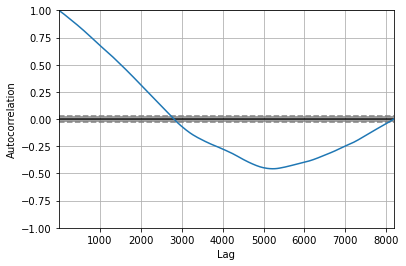

In [259]:
pd.plotting.autocorrelation_plot(df_train.set_index('Datetime').sort_index()['CPI'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

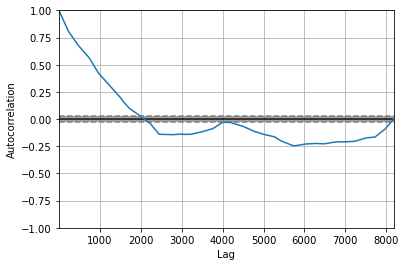

In [260]:
pd.plotting.autocorrelation_plot(df_train.set_index('Datetime').sort_index()['Unemployment'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

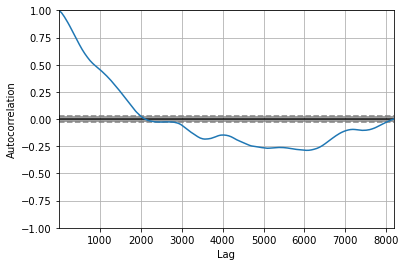

In [261]:
pd.plotting.autocorrelation_plot(df_train.set_index('Datetime').sort_index()['Fuel_Price'])

## Task V: Feature Engineering

"*Feature Engineering encapsulates various data engineering techniques such as selecting relevant features, handling missing data, encoding the data, and normalizing it. It is one of the most crucial tasks and plays a major role in determining the outcome of a model.*" [Ref](https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/).

One part of feature engineering is to create new features from given data, like `thanksgiving` column earlier was derived from `Date`. Common techniques for tabular data include to add summary statistics of the numerical features such as mean and standard deviation, to create new features from the interaction of multiple features, etc. In this task, however, we will work on handling missing data, normalizing numerical features, and encoding categorical features. 

First, missing data. Missing value treatment is crucial, yet not trivial. Take a read on [Tackling Missing Value in Dataset](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) for detailed explanation. Features with nulls or wrong values (e.g., negative fuel price) needs to be imputed or removed. 

- Do you want to keep the features with missing value? Discuss the trade offs
- If answer to the first question is yes, then how do you want to impute them? Discuss the trade offs

From ealier steps, we observed that only the markdown columns contain missing values, yet we do not have more information on what those values are for.  

In [262]:
df_train.columns[df_train.isna().sum() != 0]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'LogMarkDown1', 'LogMarkDown2', 'LogMarkDown3', 'LogMarkDown4',
       'LogMarkDown5'],
      dtype='object')

For each column, find out the percentage of the data is missing

In [265]:
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    perc_missing = df_train[col].isna().sum()/len(df_train)
    print (f'{col}: {perc_missing:.0%} is missing')

MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing


<details>
<summary>Expected Output</summary>

```
MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing
```
</details>


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [269]:
# Also adding column saying it was nan
# Putting this in the method way up
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    df_train[f'{col}_na'] = df_train[col].isna().astype(int)
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    df_train['Log'+col] = df_train['Log'+col].fillna(df_train['Log'+col].mean())
df_train[[c for c in df_train.columns if 'Mark' in c]].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,LogMarkDown1,LogMarkDown2,LogMarkDown3,LogMarkDown4,LogMarkDown5,MarkDown1_na,MarkDown2_na,MarkDown3_na,MarkDown4_na,MarkDown5_na
count,"8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00"
mean,"8,039.62","2,961.71","1,238.95","3,681.77","5,025.77",8.71,5.38,3.51,7.24,8.34,0.64,0.70,0.65,0.64,0.64
std,"3,877.36","4,370.07","4,643.81","3,499.99","1,976.27",0.48,1.34,1.16,1.00,0.37,0.48,0.46,0.48,0.48,0.48
min,410.31,0.50,0.25,8.00,554.92,6.02,0.41,0.22,2.20,6.32,0.00,0.00,0.00,0.00,0.00
25%,"8,039.62","2,961.71",69.89,"3,463.03","5,025.77",8.71,5.38,3.51,7.24,8.34,0.00,0.00,0.00,0.00,0.00
50%,"8,039.62","2,961.71","1,238.95","3,681.77","5,025.77",8.71,5.38,3.51,7.24,8.34,1.00,1.00,1.00,1.00,1.00
75%,"8,039.62","2,961.71","1,238.95","3,681.77","5,025.77",8.71,5.38,3.51,7.24,8.34,1.00,1.00,1.00,1.00,1.00
max,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",10.45,10.74,10.93,10.39,9.93,1.00,1.00,1.00,1.00,1.00


In [270]:
(df_train.isna().sum() != 0).sum() # sanity check: 0

0

Visualize the distributions for those markdown fields after imputations, are they normal?

Definitely no

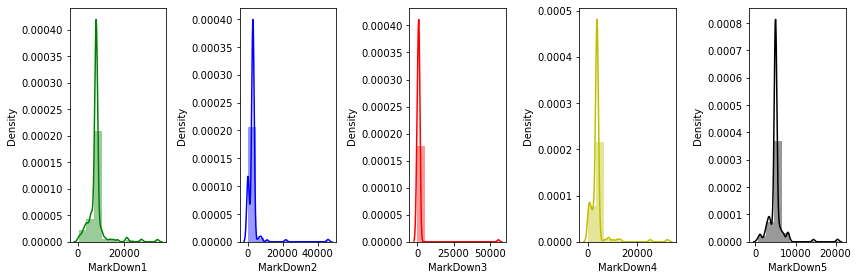

In [271]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df_train[md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

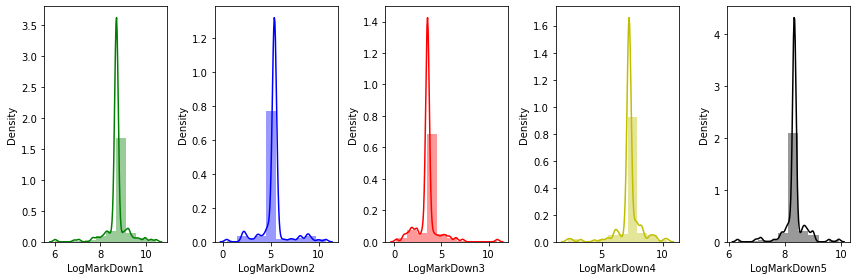

In [272]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df_train['Log'+md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

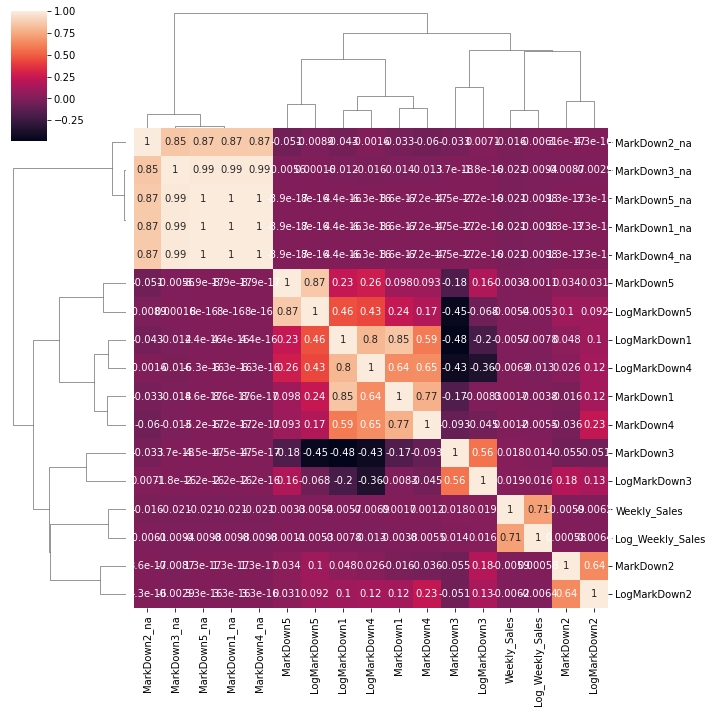

In [276]:
corr_clustmap(df_train[[c for c in df_train.columns if 'Mark' in c] + ['Weekly_Sales', 'Log_Weekly_Sales']])

Note that missing values are different from outliers. Outliers, on the other hand, are feature values that are rare in nature. They can unncessarily skew the data and causes problem for modeling. Outlier treatment involves removing or imputing such values. One popular approach to identify outliers is IQR; that is, data points that lie 1.5 times of IQR above Q3 (third quartile) and below Q1 (first quartile) are outliers. Take a read on [Detecting and Treating Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). We will leave it as an optional exercise for you to identify outliers using IQR, and replace the outliers with the median.

Now let's see how we normalize the data. For numerical features it means scaling the features to be of similar range. This step is crucial for machine learning algorithms that calculate distances between data (e.g., read [The Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

For this task, of the external features, let's keep Temperature since it is the most linearly correlated with the target variable, though very weak and negative ( feature selection ). In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [277]:
from sklearn.preprocessing import MinMaxScaler

numericalFeatures = ['Temperature', 'MarkDown1']
df_train_num = df_train[numericalFeatures]

In [278]:
df_train_num.describe() # Check the summary statistics

,Temperature,MarkDown1
count,"8,182.00","8,182.00"
mean,68.19,"8,039.62"
std,14.16,"3,877.36"
min,35.40,410.31
25%,57.79,"8,039.62"
50%,69.64,"8,039.62"
75%,80.48,"8,039.62"
max,91.65,"34,577.06"


Instantiate a MinMaxScaler and fit using `df_train_num`:

In [281]:
scaler = MinMaxScaler()
scaler.fit(df_train_num)
scaler.data_max_

MinMaxScaler()

array([   91.65, 34577.06])

Now transform training data `df_train_num` and store the resulting nparray in `train_norm`:

In [282]:
train_norm = scaler.transform(df_train_num) 

Verify that both columns now have minimum 0 and maximum 1. 

In [283]:
pd.DataFrame(train_norm, columns=df_train_num.columns).describe()

,Temperature,MarkDown1
count,"8,182.00","8,182.00"
mean,0.58,0.22
std,0.25,0.11
min,0.00,0.00
25%,0.40,0.22
50%,0.61,0.22
75%,0.80,0.22
max,1.00,1.00


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

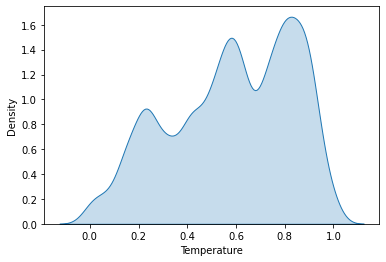

In [286]:
densplot(pd.DataFrame(train_norm, columns=df_train_num.columns)['Temperature'])

<AxesSubplot:xlabel='MarkDown1', ylabel='Density'>

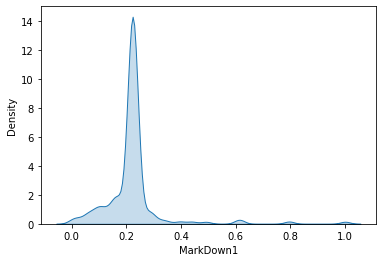

In [287]:
densplot(pd.DataFrame(train_norm, columns=df_train_num.columns)['MarkDown1'])

In [59]:
# Expected Output:

,Temperature,MarkDown1
count,"8,182.00","8,182.00"
mean,0.58,0.19
std,0.25,0.12
min,0.00,0.00
25%,0.40,0.17
50%,0.61,0.17
75%,0.80,0.17
max,1.00,1.00


Let's turn to categorical fatures. So far most, if not all Python packages for modeling do not accept strings as input; thus encoding the categorical value to numerical value is a necessary step. Here, let's apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) on `Dept` and `IsHoliday`:

In [288]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Dept', 'IsHoliday']
df_train_cat = df_train[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(df_train_cat)

Transform the categorical features using one hote encoding `ohe`. 

In [289]:
train_ohe = ohe.transform(df_train_cat)

In [290]:
train_ohe.shape, df_train_cat.shape # Expected Output: ((8182, 79), (8182, 2))

((8182, 79), (8182, 2))

The number of columns explodes from 2 to 79. 

Lastly we merge the processed numerical features with the processed categorical features using `hstack` in `numpy`:

In [300]:
import numpy as np
X_train = np.hstack([train_norm, train_ohe])

In [301]:
X_train.shape # sanity check: (8182, 81)

(8182, 81)

In [302]:
X_train

array([[0.19964444, 0.22329639, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.8208    , 0.34561233, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75644444, 0.1661235 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.84017778, 0.19716801, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08053333, 0.22329639, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.12213333, 0.22329639, 0.        , ..., 0.        , 1.        ,
        0.        ]])

What about the test data? Yes you need to apply the same treatments. We spare some copy + paste + edit and see how this can be done when we introduce `pipeline` next. 

## Task VI: Pipeline

Even with less than 20 features in our dataset, there are many many possibilities that you can preprocessing the data. There is no one-fits-all approach; often you will find yourself experimenting with many combinations to achieve better modelling performance: Should I apply normalization or standardization? Do I remove the outliers or should I impute them? Do I impute the missing values with median or mean or 0? Answers to many of these questions is "It depends." (Have you heard [Graduate Student Descent](https://sciencedryad.wordpress.com/2014/01/25/grad-student-descent/)?) That means trial-and-error and it is not efficient to produce a notebook each time when you need to try something slightly different. You will get lost quickly. Pipeline is one useful tool. 

Not only does Pipeline help streamline the process, keep the code modular, but also reduces the possibility of introducing errors/bugs. In this task, we build the pipeline following the strategies used in the last task, run a simple linear regression model, and print out the model's performance. Note there is minimal code required for you to implement, the key is to understand each step.

To avoid confusion, let's read the data again directly from `train-store1.csv`.

In [303]:
df = pd.read_csv('../dat/train-store1.csv')

In [304]:
df.shape

(10244, 16)

Separating the target `y` from the features `X`:

In [305]:
target = 'Weekly_Sales'
X, y = df.drop(columns=target), df[target]

Import `Pipeline` from submodule `sklearn.pipeline`

In [306]:
from sklearn.pipeline import Pipeline

Now we build a transformer for numerical features following two steps: impute the missing values with the feature median (use `SimpleImputer`), followed by normalization (use `MinMaxScaler`)

In [307]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['CPI', 'MarkDown1']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", MinMaxScaler()),
])

For categorical features, we apply one hot encoding `OneHotEncoder` ( there are many other options; see [Scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) ):

In [308]:
categorical_features = ['Dept', 'IsHoliday']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Piece the `numeric_transformer` and `categorical_transformer` using `ColumnTransformer`:

In [309]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Lastly, let's append the regression model to preprocessing pipeline to complete a full prediction pipeline.

In [310]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

The pipepline has been built! The rest is to 
- split the data into training and testing sets
- apply the pipeline to the training data
- obtain the prediction performance on testing data

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's run the prediction!

In [312]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CPI', 'MarkDown1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dept', 'IsHoliday'])])),
                ('model', LinearRegression())])

In [313]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.949


Optional: Discuss what type of [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) strategy you would use to select the features.

This is a ridiculous score, most of markdown1 is nan, and CPI is non-correlated!

Lets do better

In [323]:
df = add_features(df).dropna(subset=['Weekly_Sales'])
df.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Datetime,Week,Month,Year,LogMarkDown1,MarkDown1_na,LogMarkDown2,MarkDown2_na,LogMarkDown3,MarkDown3_na,LogMarkDown4,MarkDown4_na,LogMarkDown5,MarkDown5_na,Log_Weekly_Sales
0,1,1,2010-02-05,"24,924.50",False,42.31,2.57,"8,086.73","2,967.16","1,245.40","3,755.21","5,027.75",211.10,8.11,A,151315,2010-02-05,5,2,2010,9.00,0,8.00,0,7.13,0,8.23,0,8.52,0,10.12


In [328]:
pd.set_option('display.max_columns', None)
df.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,LogMarkDown1,MarkDown1_na,LogMarkDown2,MarkDown2_na,LogMarkDown3,MarkDown3_na,LogMarkDown4,MarkDown4_na,LogMarkDown5,MarkDown5_na,Log_Weekly_Sales
count,"10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,229.00"
mean,1.00,"21,710.54",68.22,3.22,"8,086.73","2,967.16","1,245.40","3,755.21","5,027.75",216.00,7.61,"151,315.00",8.90,0.00,7.23,0.00,5.86,0.00,7.88,0.00,8.46,0.00,9.04
std,0.00,"27,748.95",14.20,0.43,"3,908.66","4,291.76","4,655.72","3,555.14","1,952.36",4.34,0.38,0.00,0.50,0.00,1.78,0.00,2.08,0.00,1.11,0.00,0.38,0.00,1.74
min,1.00,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",6.02,0.00,0.41,0.00,0.22,0.00,2.20,0.00,6.32,0.00,0.00
25%,1.00,"3,465.62",57.79,2.76,"8,086.73","2,967.16",69.89,"3,463.03","5,027.75",211.53,7.35,"151,315.00",9.00,0.00,8.00,0.00,4.26,0.00,8.15,0.00,8.52,0.00,8.16
50%,1.00,"10,289.38",69.64,3.29,"8,086.73","2,967.16","1,245.40","3,755.21","5,027.75",215.46,7.79,"151,315.00",9.00,0.00,8.00,0.00,7.13,0.00,8.23,0.00,8.52,0.00,9.24
75%,1.00,"31,452.96",80.48,3.59,"8,086.73","2,967.16","1,245.40","3,755.21","5,027.75",220.64,7.84,"151,315.00",9.00,0.00,8.00,0.00,7.13,0.00,8.23,0.00,8.52,0.00,10.36
max,1.00,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",10.45,0.00,10.74,0.00,10.93,0.00,10.39,0.00,9.93,0.00,12.22


In [336]:
df['Log_Weekly_Sales'].isna().sum()

0

In [343]:
target = 'Weekly_Sales'
X, y = df.dropna(subset=[target]).drop(columns=target), df[target]

numeric_features = ['Temperature', 'Fuel_Price', 'LogMarkDown1', 'LogMarkDown2', 'LogMarkDown3', 'LogMarkDown4', 'LogMarkDown5', 'Unemployment', ]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", MinMaxScaler()),
])

categorical_features = ['MarkDown1_na', 'MarkDown2_na', 'MarkDown3_na', 'MarkDown4_na', 'MarkDown5_na', 'Store', 'Dept', 'IsHoliday', 'Month', 'Year', 'Size']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

# Score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print("model score: %.8f" % model.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Fuel_Price',
                                                   'LogMarkDown1',
                                                   'LogMarkDown2',
                                                   'LogMarkDown3',
                                                   'LogMarkDown4',
                                                   'LogMarkDown5',
                                                   'Unemployment']),
                                                 ('cat',
                          

model score: 0.94690930


In [344]:
# Just barely better??? lets drop some unimportant columns
target = 'Weekly_Sales'
X, y = df.drop(columns=target), df[target]

numeric_features = ['LogMarkDown1', 'LogMarkDown2', 'LogMarkDown3', 'LogMarkDown4', 'LogMarkDown5']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", MinMaxScaler()),
])

categorical_features = ['Store', 'Dept', 'IsHoliday', 'Month', 'Year']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

# Score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print("model score: %.8f" % model.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['LogMarkDown1',
                                                   'LogMarkDown2',
                                                   'LogMarkDown3',
                                                   'LogMarkDown4',
                                                   'LogMarkDown5']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Store', 'Dept', 'IsHoliday',
  

model score: 0.94689345


## Automating EDA

In this exercise, you have learned the manual way to perform EDA.  Doing EDA manually has the benefits of customization, but is also highly repetitive.  For this reason, a lot of EDA can easily be automated!  In automating our EDA, we can get to know our data more quickly and spend more time on feature engineering and modeling.  Let's check out a library called [SweetViz](https://github.com/fbdesignpro/sweetviz) to see how we can automate EDA! 

In [ ]:
import sweetviz as sv

orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

1. Click on a feature to tab to explore the feature in more detail.
1. Notice that `SweetViz` calculates the descriptive stats for each feature, along with its missing and duplicate value stats.
1. Notice that `SweetViz` helps to detect numerical vs categorical datatypes.
1. Click on the `ASSOCIATIONS` tab to explore associations/correlations!

### Prefer a browswer experience?

In [ ]:
orig_data_report.show_html('orig_data_report.html', open_browser=True)

### Now let's have a look at a comparison report of our train and test datasets!

In [ ]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook()

## Note

- EDA, like other parts of machine learning, is an iterative process, NOT linear.
- This analysis is far from being comprehensive; rather it is a starting point. 
- There does not exist one "standard" way to perform EDA. You should always keep business objectives in mind and perform analysis as seen fit. It is one of those skills that grows with lots of practices.

## References

1. Original dataset is from [kaggle: wallmart sales forecast datasets](https://www.kaggle.com/datasets/iamprateek/wallmart-sales-forecast-datasets)
2. Notebook: [craking the walmart sales forecasting challenge](https://www.kaggle.com/code/fernandol/cracking-the-walmart-sales-forecasting-challenge)